# Author Information

**Name:** Ioannis Adamou

**Email:** yiannis.adamou26@gmail.com

**Student ID:** U234N1110

**Course:** Project in Data Science (COMP-248)

**Date:** May 18, 2025

# The 12th Man Effect: Does Playing at Home Really Matter in the EPL?

## Project Objective
This project investigates the concept of home advantage in the English Premier League (EPL) football matches from 2017/18 to 2023/24. Using historical data, it aims to quantify the strength of home advantage, investigate which factors contribute most to it and whether this advantage was affected during the COVID-19 pandemic.

## Research Questions
- Does home advantage exist in the EPL, and has it changed over the years?
- What factors influence home advantage most? (crowd presence, team strength)
- Are some teams more reliant on playing at home than others?
- Was home advantage affected during COVID-19? (empty stadiums)

We will use match statistics sourced from FBRef and NativeStats to answer these questions.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

xls = pd.ExcelFile("C:\\Users\\Admin\\OneDrive\\Documents\\Yiannis_Unic\\Comp-248\\EPL_Home_advantage.xlsx")
df = xls.parse('Sheet1')

df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col or df[col].isna().all()])
df = df.dropna(subset=['Season', 'Squad'])
df['Season'] = df['Season'].astype(str)

for col in df.columns:
    if col not in ['Season', 'Squad', 'Rank']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.head()

,Season,Rank,Squad,HomeAttendance/Game,HomeMatches,HomeWins,HomeDraws,HomeLoses,HomeGoalsFor,HomeGoalsAgainst,...,AwayDraws,AwayLoses,AwayGoalsFor,AwayGoalsAgainst,AwayPoints,AwayExpGoals,AwayWinRate,Home/Away_GoalsForDiff,Home/Away_ExpGoalsDiff,Home/Away_WinRateDiff
0,23/24,1,Man City,53012.0,19.0,14.0,5.0,0.0,51.0,16.0,...,2.0,3.0,45.0,18.0,44.0,39.8,0.736842,6.0,0.9,0.000000
1,23/24,2,Arsenal,60236.0,19.0,15.0,2.0,2.0,48.0,16.0,...,3.0,3.0,43.0,13.0,42.0,32.6,0.684211,5.0,10.9,0.105263
2,23/24,3,Liverpool,55979.0,19.0,15.0,3.0,1.0,49.0,17.0,...,7.0,3.0,37.0,24.0,34.0,33.0,0.473684,12.0,21.7,0.315789
3,23/24,4,Aston Villa,41858.0,19.0,12.0,4.0,3.0,48.0,28.0,...,4.0,7.0,28.0,33.0,28.0,24.3,0.421053,20.0,14.7,0.210526
4,23/24,5,Tottenham,61482.0,19.0,13.0,0.0,6.0,38.0,27.0,...,6.0,6.0,36.0,34.0,27.0,28.9,0.368421,2.0,10.3,0.315789


## League-Wide Home vs Away Trends Over Seasons

Here we analyze how home vs away win rates and goals have changed season by season

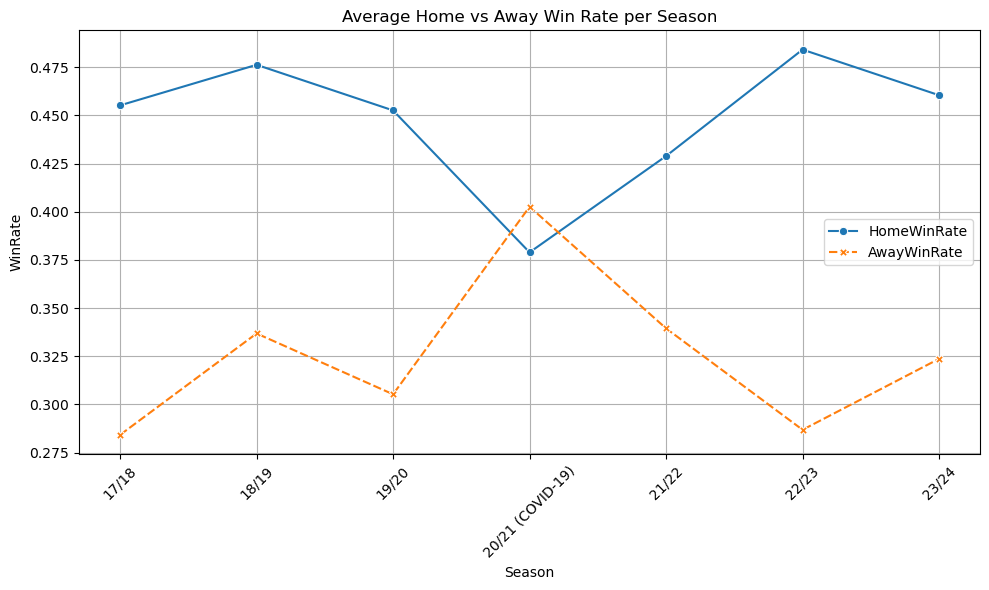

In [5]:
season_summary = df.groupby('Season')[[
    'HomeWinRate', 'AwayWinRate', 'HomeGoalsFor', 'AwayGoalsFor', 'HomeExpGoals', 'AwayExpGoals'
]].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=season_summary[['HomeWinRate', 'AwayWinRate']], markers=True)
plt.title('Average Home vs Away Win Rate per Season')
plt.ylabel('WinRate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

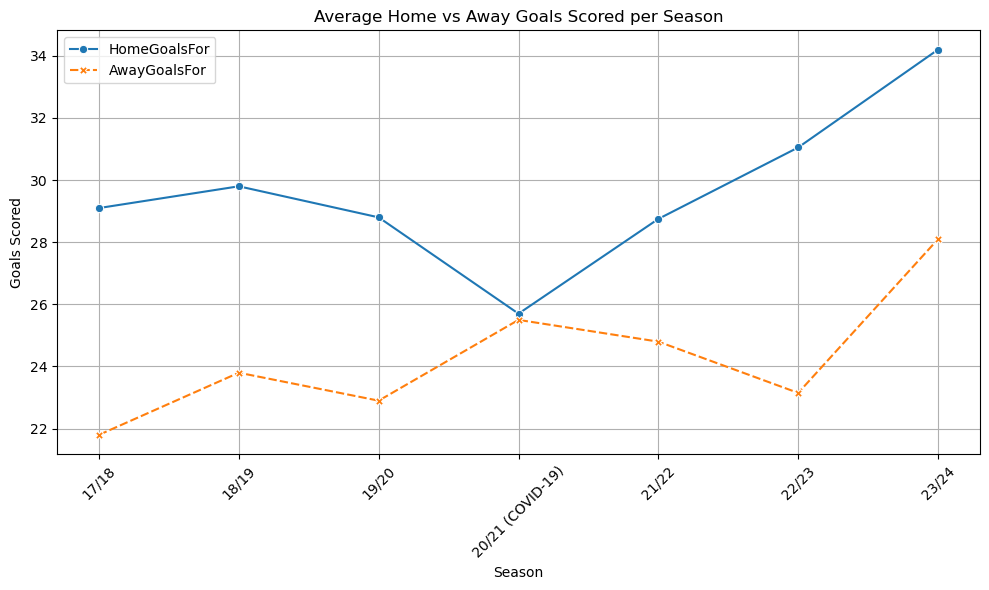

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=season_summary[['HomeGoalsFor', 'AwayGoalsFor']], markers=True)
plt.title('Average Home vs Away Goals Scored per Season')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## COVID-19 Impact on Home Advantage

The 2020/21 season was played without crowds. Let's see how this affected home performance.

In [8]:
season_2021 = df[df['Season'] =='20/21 (COVID-19)']

home_avg = season_2021['HomeWinRate'].mean()
away_avg = season_2021['AwayWinRate'].mean()

print(f"2020/21 Home Win Rate: {home_avg:.2f}")
print(f"2020/21 Away Win Rate: {away_avg:.2f}")

2020/21 Home Win Rate: 0.38
2020/21 Away Win Rate: 0.40


## Team-Level Home vs Away Advantage

Let's find out which teams benefited most from playing at home.

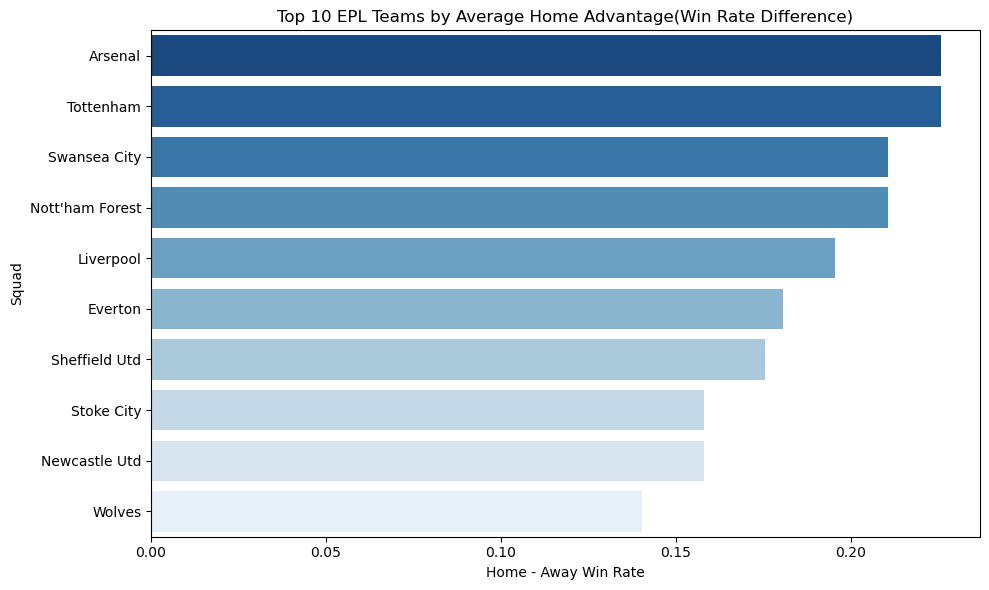

In [10]:
df['WinRateDiff'] = df['HomeWinRate'] - df['AwayWinRate']
top_advantage = df.groupby('Squad')['WinRateDiff'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_advantage.values, y=top_advantage.index, hue=top_advantage.index, palette="Blues_r", dodge=False, legend=False)
plt.title("Top 10 EPL Teams by Average Home Advantage(Win Rate Difference)")
plt.xlabel("Home - Away Win Rate")
plt.tight_layout()
plt.show()

## Conclusions

- Home advantage **exists**, but it has **weakend** slightly in recent seasons.
- The **2020/21 season** recorded the lowest home win rate, likely influenced by the absense of fans in the stadiums.
- Some teams rely heavily on their home performance.
- Further research could explore **referee behavior**, **travel effects** and **crowd noise**.

## Appendix
- **Data source:** FBRef, NativeStats (via Excel)
- **Code is available at:** [https://github.com/Yiannis26/DataScienceProject.git]( https://github.com/Yiannis26/DataScienceProject.git)
- **Video is available at:** [https://youtu.be/Pe55Y1RSHsI](https://youtu.be/Pe55Y1RSHsI)